In [290]:
# Importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score,explained_variance_score
%matplotlib inline

In [14]:
# Loading Boston House Prices Dataset

from sklearn.datasets import load_boston
boston = load_boston()
type(boston)
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [5]:
# Exploring data attributes

boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

In [24]:
boston['feature_names']

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [26]:
boston['target'].shape
boston['target']

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [30]:
# Creating Dataframe

boston_feat=pd.DataFrame(boston['data'],columns=boston['feature_names'])
boston_target=pd.DataFrame(boston['target'],columns=['MEDV'])
boston_df=pd.concat([boston_feat,boston_target],axis=1)
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [31]:
# EDA: Descriptive Stats

boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [32]:
# EDA: Basic Dataset Information

boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(14)
memory usage: 55.4 KB


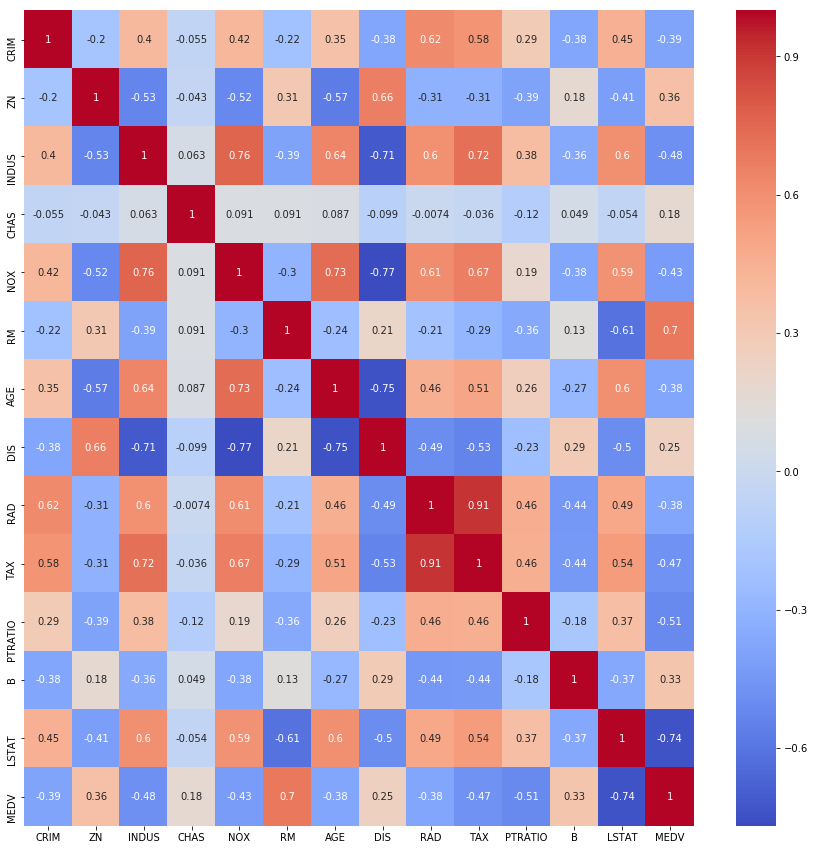

In [42]:
# EDA: Checking for Correlations
plt.figure(figsize=(15,15))
sns.heatmap(boston_df.corr(),annot=True,cmap='coolwarm')

In [ ]:
# As per the above correlation heatmap, following seem to be the most significant predictors: 
# LSTAT, RM, PTRATIO, INDUS, TAX & NOX 

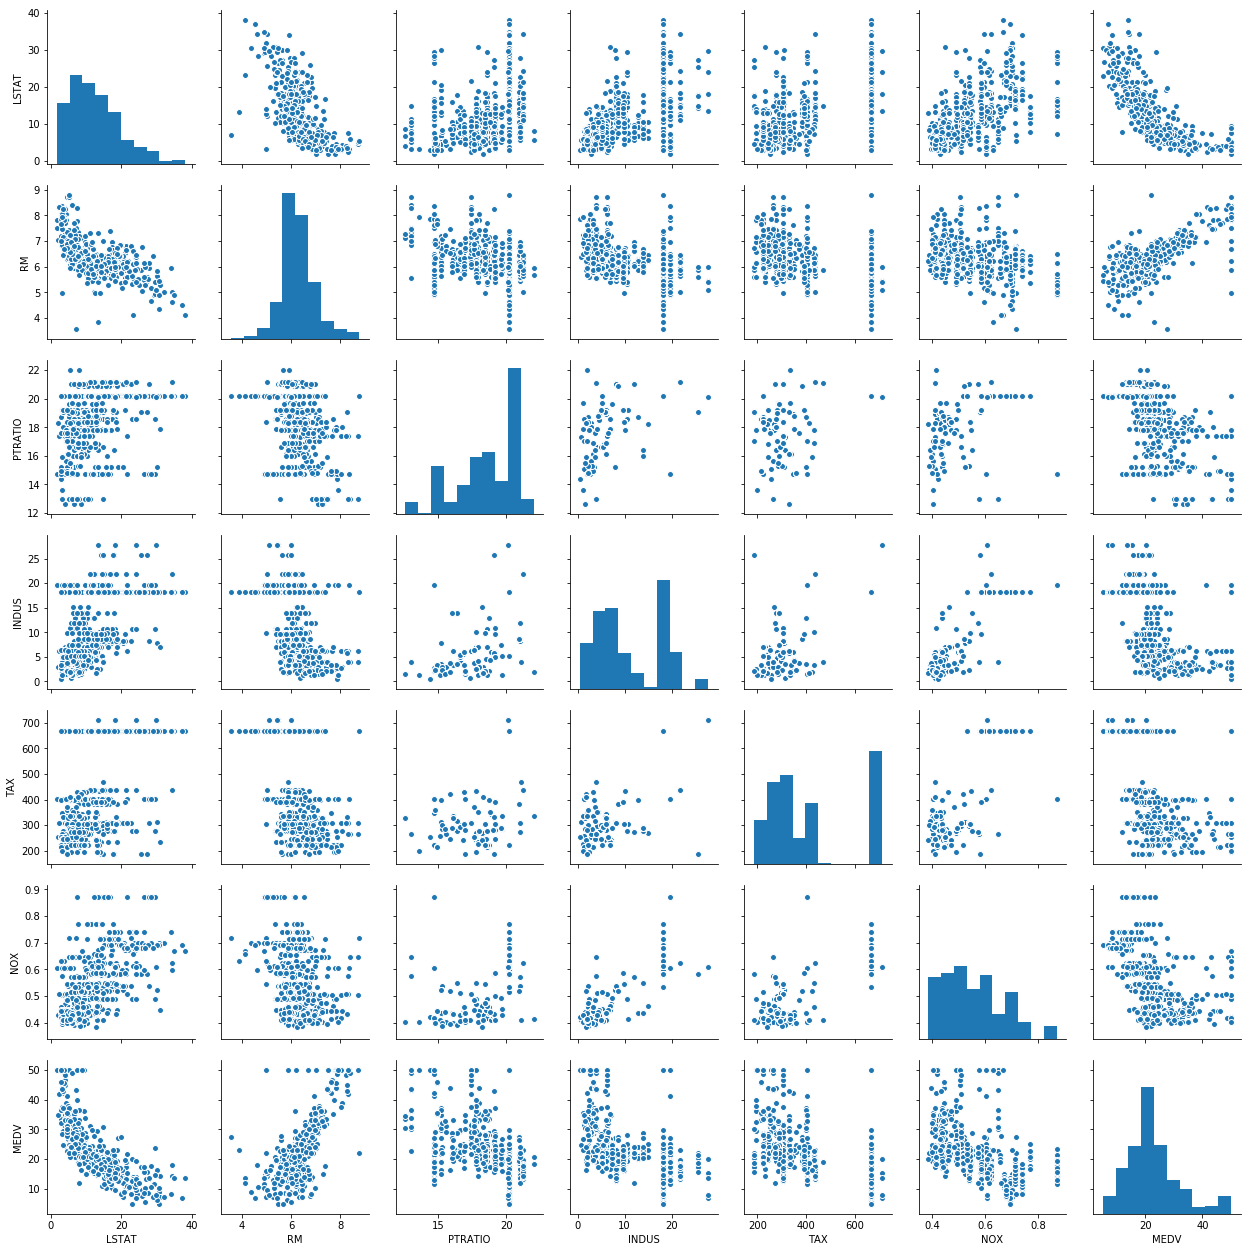

In [59]:
# EDA: Plotting MEDV vs most significant predictors
sns.pairplot(data=boston_df.loc[:,['LSTAT','RM','PTRATIO','INDUS','TAX','NOX','MEDV']])


In [ ]:
# As per the above distibution plots, following seem to be the most important predictors: LSTAT & RM

C:\Users\ashish sood\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Mean of MEDV: 22.532806324110698
Median of MEDV: 21.2
Mode of MEDV: 0    50.0
dtype: float64


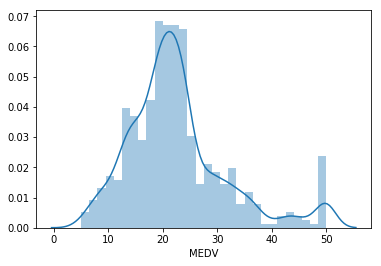

In [66]:
# EDA: Plotting target variable data distribution
sns.distplot(boston_df['MEDV'],bins=30)
print('Mean of MEDV: {}'.format(boston_df['MEDV'].mean()))
print('Median of MEDV: {}'.format(boston_df['MEDV'].median()))
print('Mode of MEDV: {}'.format(boston_df['MEDV'].mode()))


In [63]:
# Creating Matrix of Features and Dependent Variable Vector

X=boston_df.drop(['MEDV'],axis=1)
y=boston_df['MEDV']
print(X.head())
print(y.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33  
0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64


In [73]:
# Train Test Split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=101)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(379, 13)
(127, 13)
(379,)
(127,)


In [85]:
# Linear Regression Model Training
lin_reg=LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [87]:
# Linear Regression Model Attributes
coeff_df = pd.DataFrame(lin_reg.coef_,X.columns,columns=['Coefficient'])
print(coeff_df)
print(lin_reg.intercept_)

         Coefficient
CRIM       -0.092891
ZN          0.049485
INDUS       0.013374
CHAS        3.248631
NOX       -16.740245
RM          3.534606
AGE         0.000325
DIS        -1.509217
RAD         0.259736
TAX        -0.009699
PTRATIO    -0.922780
B           0.007259
LSTAT      -0.577752
37.8225598409344


In [84]:
# Get Linear Regression Model predictions
lin_reg_pred=lin_reg.predict(X_test)

In [247]:
# Train and Test scores comparison
print(lin_reg.score(X_train,y_train))
print(lin_reg.score(X_test,y_test))

0.7488184488858782
0.7121285365416753


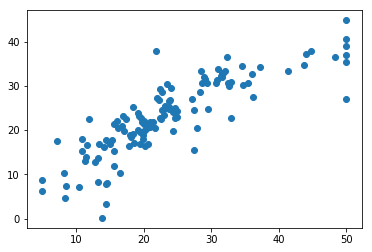

In [99]:
# Visualize predictions vs true values
plt.scatter(y_test,lin_reg_pred)

C:\Users\ashish sood\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


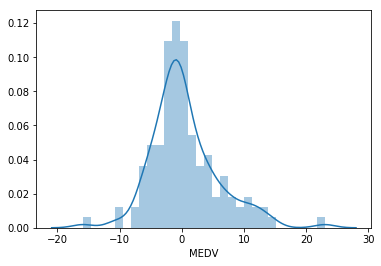

In [101]:
sns.distplot(y_test-lin_reg_pred,bins=30)

C:\Users\ashish sood\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


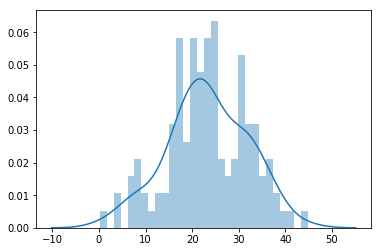

In [244]:
# Visualizing the distribution of Linear Regression predictions
sns.distplot(lin_reg_pred,bins=30)

In [105]:
# Linear Regression Model Evaluation

print('MAE:',mean_absolute_error(y_test,lin_reg_pred))
print('MSE:',mean_squared_error(y_test,lin_reg_pred))
print('RMSE:',np.sqrt(mean_squared_error(y_test,lin_reg_pred)))
print('R Squared:', r2_score(y_test,lin_reg_pred))
print('Explained Variance Score:', explained_variance_score(y_test,lin_reg_pred))

MAE: 3.89889662942123
MSE: 30.11918645232916
RMSE: 5.4880949747912675
R Squared: 0.7121285365416753
Explained Variance Score: 0.7141873406560095


In [106]:
#L1 Regularization
# Lasso Regression Model Training: Using default hyper parameters
lasso_reg=Lasso()
lasso_reg.fit(X_train,y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [107]:
# Lasso Regression Model Attributes
lasso_coeff_df = pd.DataFrame(lasso_reg.coef_,X.columns,columns=['Coefficient'])
print(lasso_coeff_df)
print(lasso_reg.intercept_)

         Coefficient
CRIM       -0.042031
ZN          0.054768
INDUS      -0.000000
CHAS        0.000000
NOX        -0.000000
RM          0.419252
AGE         0.022386
DIS        -0.700216
RAD         0.225650
TAX        -0.012222
PTRATIO    -0.716657
B           0.006255
LSTAT      -0.825633
44.71383725455162


In [ ]:
# Key Observation: The coefficients for the following vairables have shrunk to 0: INDUS, CHAS and NOX 
# i.e. these features may be removed from the model equation

In [207]:
#L1 Regularization 
# Lasso Regression Model Training: Tuning hyperparameter(trying out different values of alpha and evaluating its 
# impact on the model output)

#lasso_reg=Lasso(alpha=0.01,normalize=True)
lasso_reg=Lasso(alpha=0.01)
#lasso_reg=Lasso(alpha=0.1)
#lasso_reg=Lasso(alpha=1)
#lasso_reg=Lasso(alpha=10)
lasso_reg.fit(X_train,y_train)

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [208]:
# Lasso Regression Model Attributes
lasso_coeff_df = pd.DataFrame(lasso_reg.coef_,X.columns,columns=['Coefficient'])
print(lasso_coeff_df)
print(lasso_reg.intercept_)

         Coefficient
CRIM       -0.091527
ZN          0.049927
INDUS       0.001075
CHAS        3.116264
NOX       -13.493814
RM          3.539440
AGE        -0.002285
DIS        -1.453766
RAD         0.252686
TAX        -0.009984
PTRATIO    -0.886252
B           0.007408
LSTAT      -0.581992
35.61034001557286


In [209]:
# Get Lasso Regression Model predictions
lasso_reg_pred=lasso_reg.predict(X_test)

C:\Users\ashish sood\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


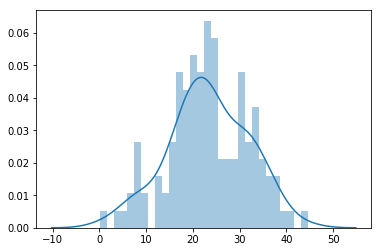

In [245]:
# Visualizing the distribution of Lasso Regression predictions
sns.distplot(lasso_reg_pred,bins=30)

In [210]:
# Train and Test scores comparison
print(lasso_reg.score(X_train,y_train))
print(lasso_reg.score(X_test,y_test))

0.7483669390831745
0.7112275870543003


In [211]:
# Lasso Regression Model Evaluation
print('MAE:',mean_absolute_error(y_test,lasso_reg_pred))
print('MSE:',mean_squared_error(y_test,lasso_reg_pred))
print('RMSE:',np.sqrt(mean_squared_error(y_test,lasso_reg_pred)))
print('R Squared:', r2_score(y_test,lasso_reg_pred))
print('Explained Variance Score:', explained_variance_score(y_test,lasso_reg_pred))

MAE: 3.8862703119864443
MSE: 30.213450278511797
RMSE: 5.4966762937717
R Squared: 0.7112275870543003
Explained Variance Score: 0.7131229097361917


In [ ]:
# Key observations(Lasso Regressor): 
# 1. When alpha is very small(alpha=0.01), the results are smilar to linear Regression
# 2. When alpha is too large(alpha=10), the coeffiecients are heavily penalized. Hence, the model underfits with poor training 
#and test score.
# 3. Best performance is obtained when alpha=0.01


In [236]:
#L2 Regularization
# Ridge Regression Model Training

#ridge_reg=Ridge()
ridge_reg=Ridge(alpha=0.1)
#ridge_reg=Ridge(alpha=0.01)
#ridge_reg=Ridge(alpha=10)
ridge_reg.fit(X_train,y_train)

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [237]:
# Ridge Regression Model Attributes
ridge_coeff_df = pd.DataFrame(ridge_reg.coef_,X.columns,columns=['Coefficient'])
print(ridge_coeff_df)
print(ridge_reg.intercept_)

         Coefficient
CRIM       -0.092443
ZN          0.049696
INDUS       0.008434
CHAS        3.245994
NOX       -15.436508
RM          3.546002
AGE        -0.000943
DIS        -1.488820
RAD         0.256777
TAX        -0.009805
PTRATIO    -0.907684
B           0.007315
LSTAT      -0.578644
36.874741393774585


In [238]:
# Get Ridge Regression Model predictions
ridge_reg_pred=ridge_reg.predict(X_test)

C:\Users\ashish sood\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


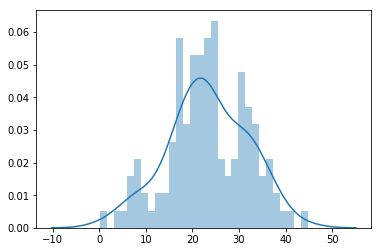

In [246]:
# Visualizing the distribution of Ridge Regression predictions
sns.distplot(ridge_reg_pred,bins=30)

In [239]:
# Train and Test scores comparison
print(ridge_reg.score(X_train,y_train))
print(ridge_reg.score(X_test,y_test))

0.7487494845730643
0.7117498023779424


In [235]:
# Ridge Regression Model Evaluation
print('MAE:',mean_absolute_error(y_test,ridge_reg_pred))
print('MSE:',mean_squared_error(y_test,ridge_reg_pred))
print('RMSE:',np.sqrt(mean_squared_error(y_test,ridge_reg_pred)))
print('R Squared:', r2_score(y_test,ridge_reg_pred))
print('Explained Variance Score:', explained_variance_score(y_test,ridge_reg_pred))

MAE: 3.9144457662467484
MSE: 31.09009490372441
RMSE: 5.575849254035156
R Squared: 0.7028488424427135
Explained Variance Score: 0.7042440808322568


In [ ]:
# Key observations(Ridge Regressor): 

# 1. The coefficients are never shruk to absolute zero i.e. no features are removed.
# 2. Unlike Lasso Regression, the results do not vary much for different values of alpha.
# 3. The results are not very different from the ones using Linear regression.

In [282]:
# Elastic Net Regression Model Training: Using default hyper parameters

elas_reg=ElasticNet(alpha=0.01)
#elas_reg=ElasticNet(alpha=0.1)
#elas_reg=ElasticNet()
#elas_reg=ElasticNet(alpha=10)
elas_reg.fit(X_train,y_train)

ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [283]:
# Elastic Net Regression Model Attributes
elas_coeff_df = pd.DataFrame(elas_reg.coef_,X.columns,columns=['Coefficient'])
print(elas_coeff_df)
print(elas_reg.intercept_)

         Coefficient
CRIM       -0.086537
ZN          0.054291
INDUS      -0.040164
CHAS        1.426822
NOX        -0.054644
RM          2.991629
AGE        -0.007035
DIS        -1.202595
RAD         0.245989
TAX        -0.012206
PTRATIO    -0.771685
B           0.007961
LSTAT      -0.644066
30.940101001836336


In [284]:
# Get Elastic Net Regression Model predictions
elas_reg_pred=elas_reg.predict(X_test)

C:\Users\ashish sood\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


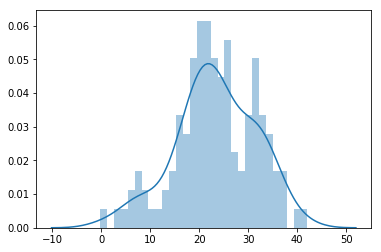

In [285]:
# Visualizing the distribution of Lasso Regression predictions
sns.distplot(elas_reg_pred,bins=30)

In [286]:
# Train and Test scores comparison
print(elas_reg.score(X_train,y_train))
print(elas_reg.score(X_test,y_test))

0.7326117365717553
0.699190935317668


In [287]:
# Elastic Net Regression Model Evaluation
print('MAE:',mean_absolute_error(y_test,elas_reg_pred))
print('MSE:',mean_squared_error(y_test,elas_reg_pred))
print('RMSE:',np.sqrt(mean_squared_error(y_test,elas_reg_pred)))
print('R Squared:', r2_score(y_test,elas_reg_pred))
print('Explained Variance Score:', explained_variance_score(y_test,elas_reg_pred))

MAE: 3.9487129751861976
MSE: 31.47281150022547
RMSE: 5.610063413208933
R Squared: 0.699190935317668
Explained Variance Score: 0.7006043960273083


In [ ]:
# Key observations(Ridge Regressor): 

# 1. The coefficients are never shruk to absolute zero i.e. no features are removed.
# 2. The model performance deteriorates when alpha is too high i.e. when coefficients are heavenly penalized.
# 3. Model performance is comparatively high and does not vary much for Alpha=0.01 and 0.1.

In [ ]:
# Trying other regression techniques to see if we can improve the prediction results. Lets start with Decision Tree Regression.

In [294]:
# Checking various hyperparameter options for Decision Tree Regressor
help(DecisionTreeRegressor)

Help on class DecisionTreeRegressor in module sklearn.tree.tree:

class DecisionTreeRegressor(BaseDecisionTree, sklearn.base.RegressorMixin)
 |  A decision tree regressor.
 |  
 |  Read more in the :ref:`User Guide <tree>`.
 |  
 |  Parameters
 |  ----------
 |  criterion : string, optional (default="mse")
 |      The function to measure the quality of a split. Supported criteria
 |      are "mse" for the mean squared error, which is equal to variance
 |      reduction as feature selection criterion and minimizes the L2 loss
 |      using the mean of each terminal node, "friedman_mse", which uses mean
 |      squared error with Friedman's improvement score for potential splits,
 |      and "mae" for the mean absolute error, which minimizes the L1 loss
 |      using the median of each terminal node.
 |  
 |      .. versionadded:: 0.18
 |         Mean Absolute Error (MAE) criterion.
 |  
 |  splitter : string, optional (default="best")
 |      The strategy used to choose the split at eac

In [295]:
# Decision Tree Model Training
dt_reg=DecisionTreeRegressor(random_state=101)
dt_reg.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=101, splitter='best')

In [293]:
# Checking DT Regressor attributes
print(dt_reg.feature_importances_)
print(dt_reg.max_features_)
print(dt_reg.n_features_)
print(dt_reg.n_outputs_)
print(dt_reg.tree_)

[2.11156464e-02 7.71165024e-04 5.23815900e-03 2.69205395e-04
 2.76755987e-02 2.66461618e-01 1.08832647e-02 6.99591612e-02
 2.30430054e-03 1.45318992e-02 1.21858685e-02 6.59159639e-03
 5.62012516e-01]
13
13
1


In [300]:
# Get DT Regression Model predictions
dt_reg_pred=dt_reg.predict(X_test)

C:\Users\ashish sood\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


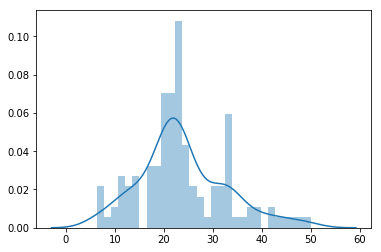

In [301]:
# Visualizing the distribution of DT Regression predictions
sns.distplot(dt_reg_pred,bins=30)

In [303]:
# Train and Test scores comparison
print(dt_reg.score(X_train,y_train))
print(dt_reg.score(X_test,y_test))

1.0
0.8003598070645385


In [ ]:
# Key Observations: 

# 1. The training score is maximum i.e. 1.
# 2. The model appears to be overfitting as the test score is lower than the training score.
# 3. The test score is still better than the regression techniques used prior to DT i.e. this is the best test score of all the
#    regression techniques used so far.

In [304]:
# Elastic Net Regression Model Evaluation
print('MAE:',mean_absolute_error(y_test,dt_reg_pred))
print('MSE:',mean_squared_error(y_test,dt_reg_pred))
print('RMSE:',np.sqrt(mean_squared_error(y_test,dt_reg_pred)))
print('R Squared:', r2_score(y_test,dt_reg_pred))
print('Explained Variance Score:', explained_variance_score(y_test,dt_reg_pred))

MAE: 3.2669291338582673
MSE: 20.887795275590552
RMSE: 4.570316758780572
R Squared: 0.8003598070645385
Explained Variance Score: 0.8006388476692634


In [ ]:
# Trying Random Forest Regression to check if the performance can be improved further and variance can be used as DT model 
# seems to be overfitting despte a better Training score than other techniques.


In [305]:
# Checking various hyperparameter options for Random Forest Regressor
help(RandomForestRegressor)

Help on class RandomForestRegressor in module sklearn.ensemble.forest:

class RandomForestRegressor(ForestRegressor)
 |  A random forest regressor.
 |  
 |  A random forest is a meta estimator that fits a number of classifying
 |  decision trees on various sub-samples of the dataset and use averaging
 |  to improve the predictive accuracy and control over-fitting.
 |  The sub-sample size is always the same as the original
 |  input sample size but the samples are drawn with replacement if
 |  `bootstrap=True` (default).
 |  
 |  Read more in the :ref:`User Guide <forest>`.
 |  
 |  Parameters
 |  ----------
 |  n_estimators : integer, optional (default=10)
 |      The number of trees in the forest.
 |  
 |  criterion : string, optional (default="mse")
 |      The function to measure the quality of a split. Supported criteria
 |      are "mse" for the mean squared error, which is equal to variance
 |      reduction as feature selection criterion, and "mae" for the mean
 |      absolute 

In [306]:
#Random Forest Model Training
rf_reg=RandomForestRegressor(n_estimators=50,oob_score=True,random_state=101)
rf_reg.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
           oob_score=True, random_state=101, verbose=0, warm_start=False)

In [308]:
# Checking Random Forest Regressor attributes: Estimators
print(rf_reg.estimators_)


[DecisionTreeRegressor(criterion='mse', max_depth=None, max_features='auto',
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=70431583, splitter='best'), DecisionTreeRegressor(criterion='mse', max_depth=None, max_features='auto',
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=225658379, splitter='best'), DecisionTreeRegressor(criterion='mse', max_depth=None, max_features='auto',
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=303514961, splitter='best'), DecisionTreeRegressor(criterion='mse'

In [310]:
# Checking Random Forest Regressor attributes: checking the feature importance
print(100*rf_reg.feature_importances_)

[ 3.86872117  0.125231    0.83997066  0.08546816  2.47683153 28.53583895
  1.4608209   6.1368943   0.70815371  1.71423296  1.52180482  1.11601134
 51.41002051]


In [311]:
# Checking Random Forest Regressor attributes: checking the no of features and outputs
print(rf_reg.n_features_)
print(rf_reg.n_outputs_)

13
1


In [316]:
# Checking Random Forest Regressor attributes: checking the out of bag score and prediction
print(rf_reg.oob_score_)
print(rf_reg.oob_prediction_)

0.8484720609036579
[ 9.0625     17.1173913  20.25       24.36363636 34.37       22.29230769
 19.76111111 26.49375    21.76153846 25.3625     25.48       40.33157895
 22.70588235 12.59047619 42.91304348 32.31428571 18.35238095 27.96315789
 20.43684211 20.25294118 23.07894737 22.13888889 24.29411765 19.15
 15.23809524 43.78214286 40.51333333 21.96315789 21.12380952 21.91875
 16.43157895 18.49411765 23.315      18.2375     24.5875     48.55882353
 27.27037037 22.505      21.41666667 21.615      25.49       15.968
 12.84444444 21.275      33.96       39.5        22.54090909 11.16470588
 13.77142857 29.73333333 19.3        25.24285714 25.23913043 21.01111111
 20.73571429 21.34117647 41.33076923 22.65882353 42.46363636 18.96470588
 13.45       19.81875    15.58       24.17857143 31.795      12.42857143
 19.46       16.36842105 22.81       32.26666667 19.99375    20.85294118
 25.93888889 17.90952381 20.36666667 24.4625     25.94       20.36666667
 15.68947368 19.31333333 18.62857143 31.615384

In [ ]:
# OOB score is 84%

In [317]:
# Get Random Forest Regression Model predictions
rf_reg_pred=rf_reg.predict(X_test)

C:\Users\ashish sood\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


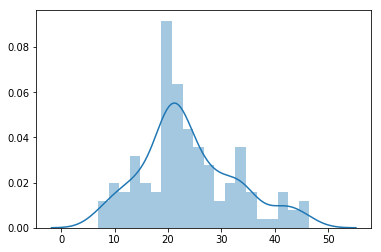

In [322]:
# Visualizing the distribution of Random Forest Regression predictions
sns.distplot(rf_reg_pred,bins=20)

In [318]:
# Train and Test scores comparison
print(rf_reg.score(X_train,y_train))
print(rf_reg.score(X_test,y_test))

0.980312414008438
0.8722439788638578


In [ ]:
# Observations: The scores are the highest so far.

In [319]:
# Random Forest Regression Model Evaluation
print('MAE:',mean_absolute_error(y_test,rf_reg_pred))
print('MSE:',mean_squared_error(y_test,rf_reg_pred))
print('RMSE:',np.sqrt(mean_squared_error(y_test,rf_reg_pred)))
print('R Squared:', r2_score(y_test,rf_reg_pred))
print('Explained Variance Score:', explained_variance_score(y_test,rf_reg_pred))

MAE: 2.53244094488189
MSE: 13.366755338582673
RMSE: 3.6560573489187327
R Squared: 0.8722439788638578
Explained Variance Score: 0.8724694003524128


In [ ]:
#Observation: Random Forest regressor has outperformed all other regression techniques.